# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [3]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


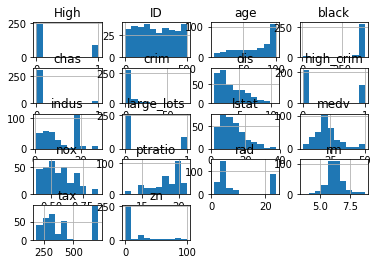

In [13]:
df.hist()
plt.show();

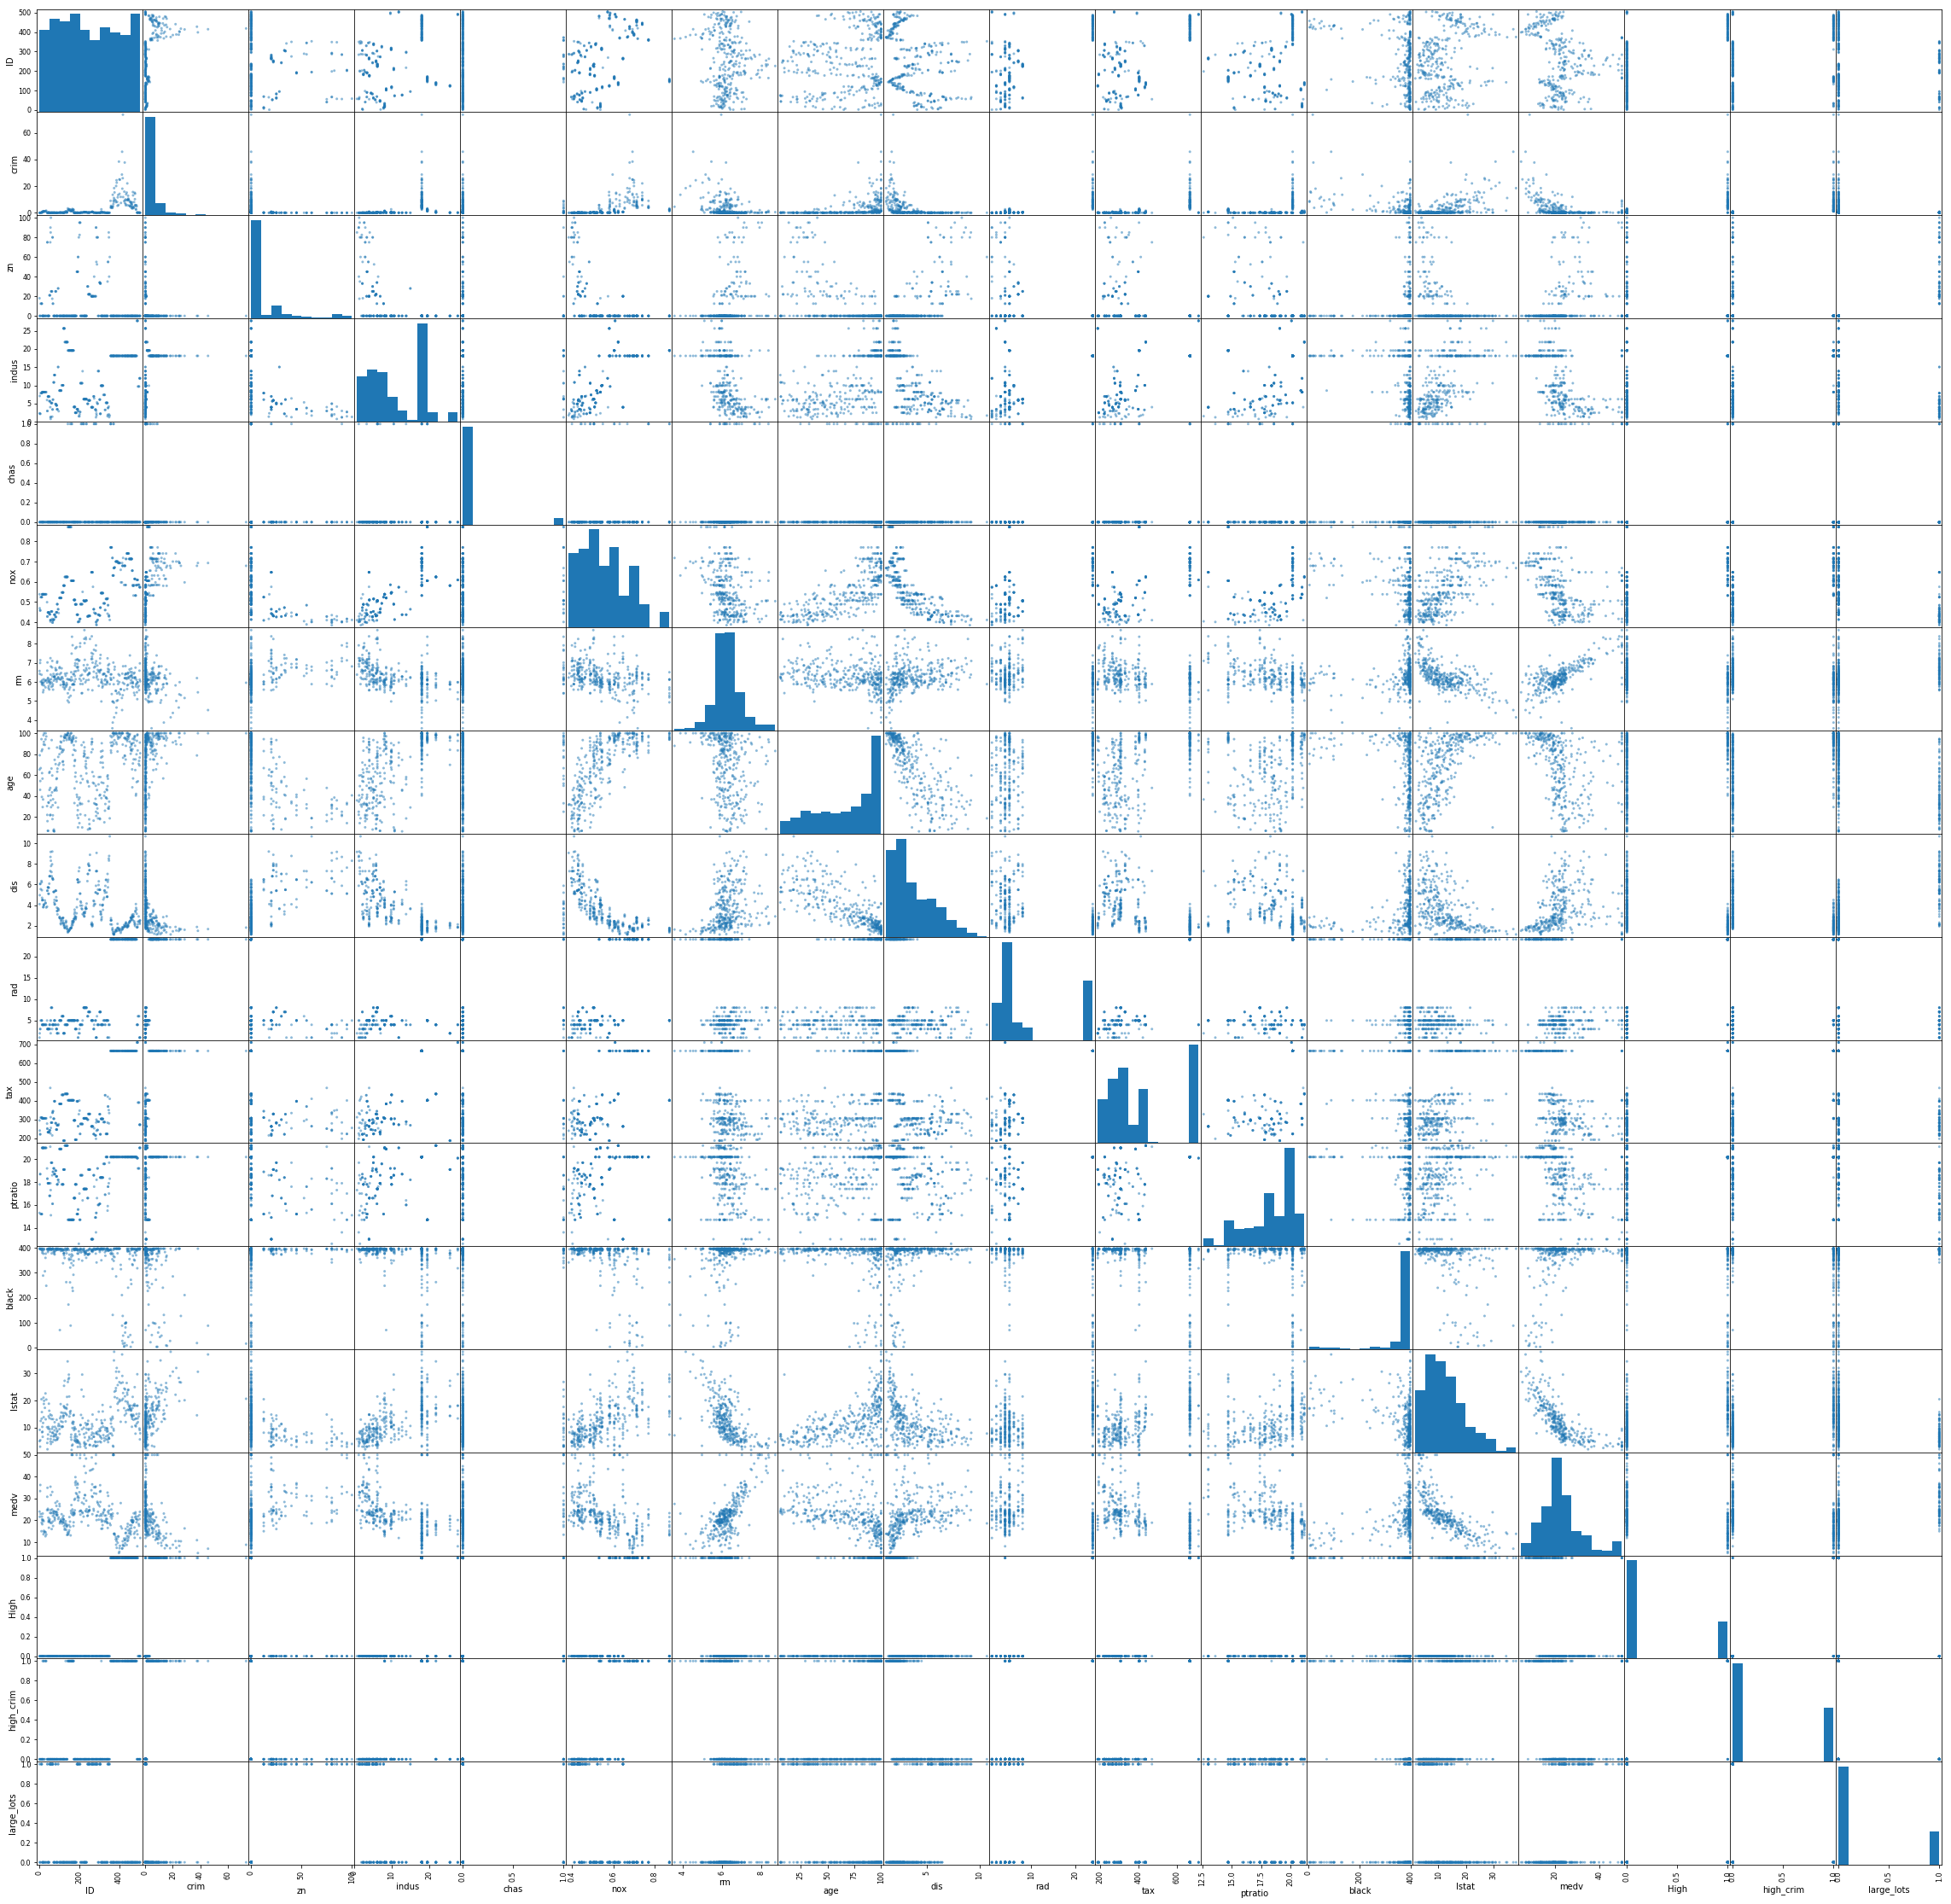

In [16]:
pd.plotting.scatter_matrix(df, figsize=(40,40))
plt.show();

'This code creates an indicator for high tax neighborhoods.  The histogram indicates a break in the distribution above $500 per $10,000 in property value. \nI chose to split on tax rates because of this natural break in the data and because tax rates can be a proxy for neighborhood wealth and government services.'

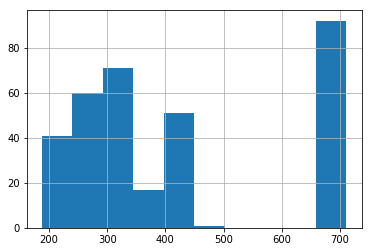

In [5]:
df['tax'].hist()
df.loc[df['tax']>500, 'High'] = 1
df.loc[df['tax']<=500, 'High'] = 0
htax = df.loc[df['tax']>=500] 
"""This code creates an indicator for high tax neighborhoods.  The histogram indicates a break in the distribution above $500 per $10,000 in property value. 
I chose to split on tax rates because of this natural break in the data and because tax rates can be a proxy for neighborhood wealth and government services."""

'This code creates an indicator for high crime neighborhoods.  The histogram indicates a modal bin at values below 1. Descriptive statistics indicate a median of .26.\nI chose to split on crime rates because of the impacts of high crime rates on communities.'

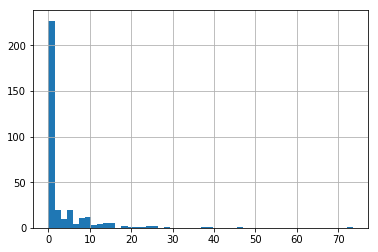

In [6]:
df['crim'].hist(bins=50)
df.loc[df['crim']>=1, 'high_crim'] = 1
df.loc[df['crim']<1, 'high_crim'] = 0
hcrim = df.loc[df['crim']>=1] 
"""This code creates an indicator for high crime neighborhoods.  The histogram indicates a modal bin at values below 1. Descriptive statistics indicate a median of .26.
I chose to split on crime rates because of the impacts of high crime rates on communities."""

'This code creates an indicator for neighborhoods with a non-zero proportion of residential land zoned for lots over 25,000 sq.ft. The histogram indicates a break in the distribution between those neighborhoods with 0% large lots and everyone else. \nI chose to split on lot size because of this natural break in the data and because lot size can be a proxy for neighborhood wealth.'

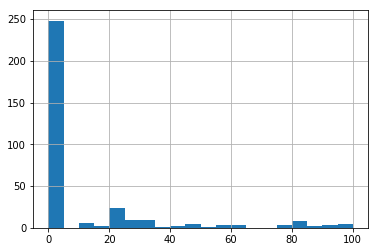

In [7]:
df['zn'].hist(bins=20)
df.loc[df['zn']>0, 'large_lots'] = 1
df.loc[df['zn']==0, 'large_lots'] = 0
llots = df.loc[df['zn']>0] 
"""This code creates an indicator for neighborhoods with a non-zero proportion of residential land zoned for lots over 25,000 sq.ft. The histogram indicates a break in the distribution between those neighborhoods with 0% large lots and everyone else. 
I chose to split on lot size because of this natural break in the data and because lot size can be a proxy for neighborhood wealth."""

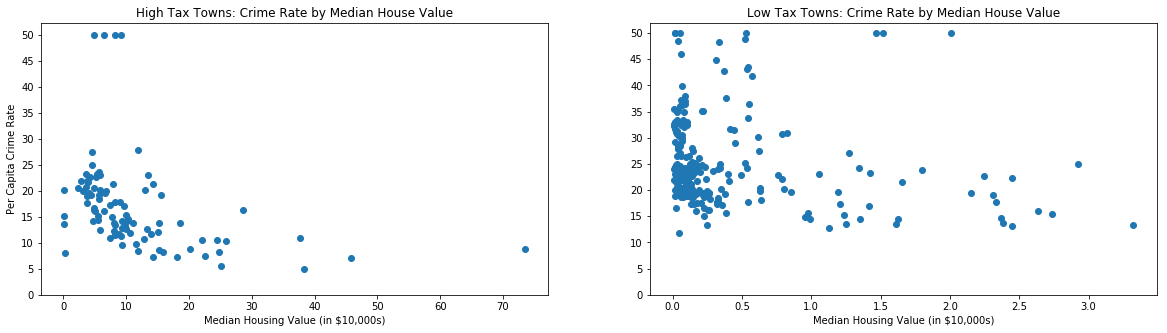

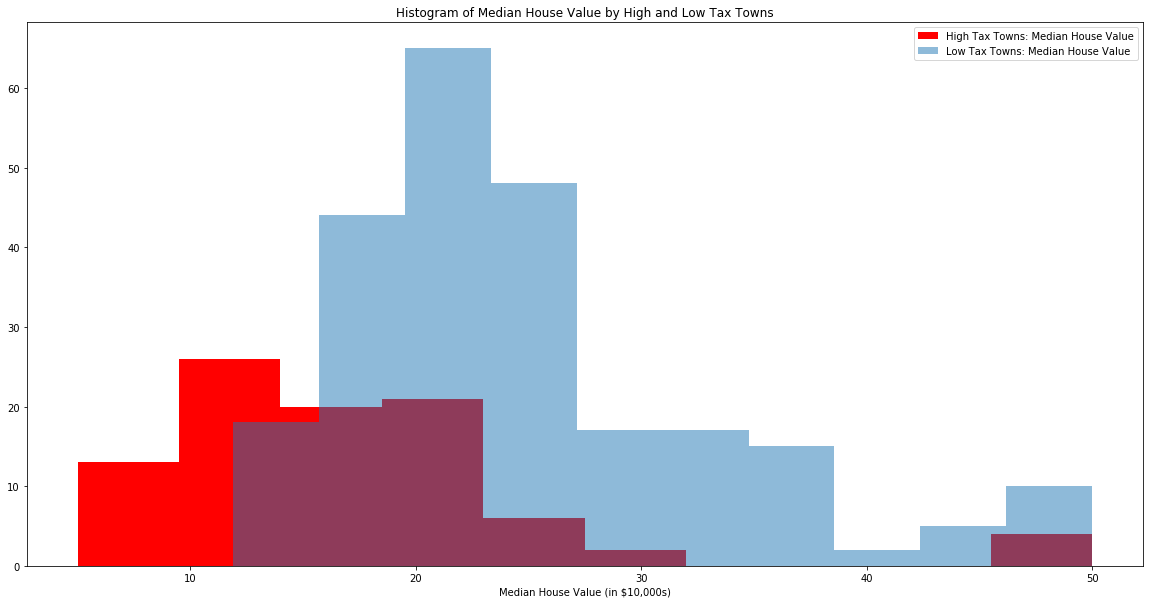

In [94]:
#Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.#
high_tax_df = df[df['High']==1]
low_tax_df = df[df['High']==0]

tax_fig = plt.figure(figsize=(20,5))
ax1 = tax_fig.add_subplot(121)
plt.ylabel('Per Capita Crime Rate')
plt.xlabel('Median Housing Value (in $10,000s)')
ax2 = tax_fig.add_subplot(122)
plt.xlabel('Median Housing Value (in $10,000s)')
ax1.scatter(x=high_tax_df['crim'], y=high_tax_df['medv'])
ax2.scatter(x=low_tax_df['crim'], y=low_tax_df['medv'])
ax1.title.set_text('High Tax Towns: Crime Rate by Median House Value')
ax2.title.set_text('Low Tax Towns: Crime Rate by Median House Value')
ax1.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
ax2.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])


plt.show;

tax_fig = plt.figure(figsize=(20,10))
ax1 = tax_fig.add_subplot(111)
ax2 = tax_fig.add_subplot(111)
ax1.hist(high_tax_df['medv'], color='Red', label='High Tax Towns: Median House Value')
ax2.hist(low_tax_df['medv'], alpha=0.5, label='Low Tax Towns: Median House Value')
plt.legend()
plt.xlabel('Median House Value (in $10,000s)')
plt.title('Histogram of Median House Value by High and Low Tax Towns')

plt.show;

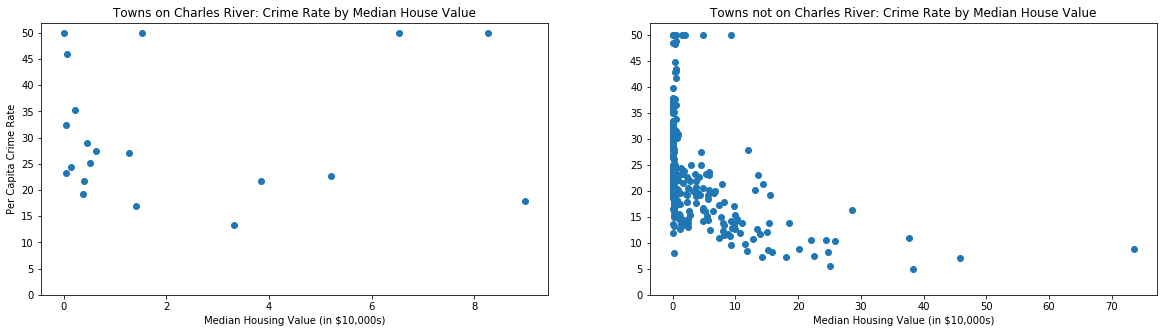

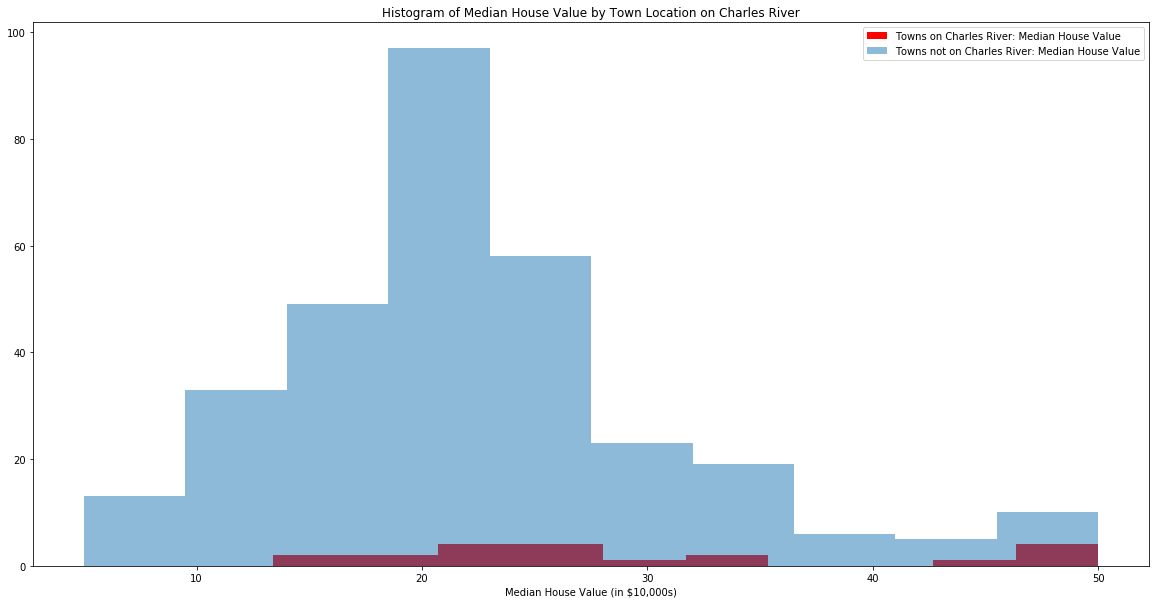

In [97]:
#Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.#
on_charles_df = df[df['chas']==1]
not_on_charles_df = df[df['chas']==0]

tax_fig = plt.figure(figsize=(20,5))
ax1 = tax_fig.add_subplot(121)
plt.ylabel('Per Capita Crime Rate')
plt.xlabel('Median Housing Value (in $10,000s)')
ax2 = tax_fig.add_subplot(122)
plt.xlabel('Median Housing Value (in $10,000s)')
ax1.scatter(x=on_charles_df['crim'], y=on_charles_df['medv'])
ax2.scatter(x=not_on_charles_df['crim'], y=not_on_charles_df['medv'])
ax1.title.set_text('Towns on Charles River: Crime Rate by Median House Value')
ax2.title.set_text('Towns not on Charles River: Crime Rate by Median House Value')
ax1.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
ax2.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])


plt.show;

tax_fig = plt.figure(figsize=(20,10))
ax1 = tax_fig.add_subplot(111)
ax2 = tax_fig.add_subplot(111)
ax1.hist(on_charles_df['medv'], color='Red', label='Towns on Charles River: Median House Value')
ax2.hist(not_on_charles_df['medv'], alpha=0.5, label='Towns not on Charles River: Median House Value')
plt.legend()
plt.xlabel('Median House Value (in $10,000s)')
plt.title('Histogram of Median House Value by Town Location on Charles River')

plt.show;

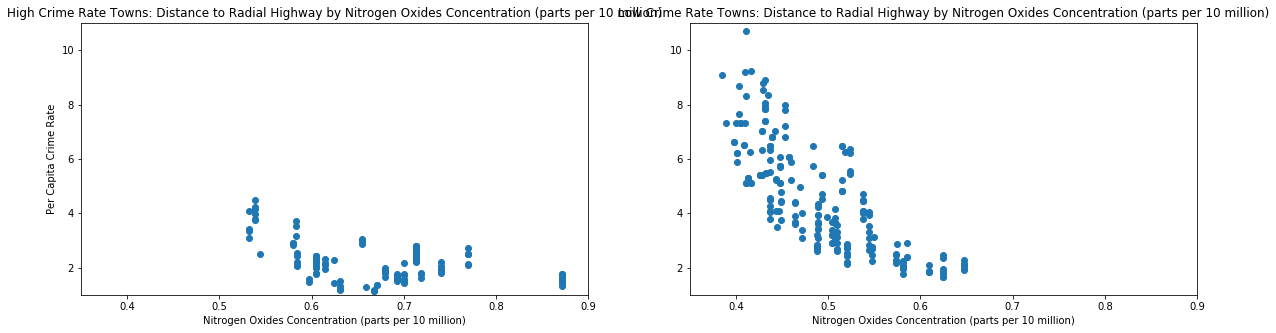

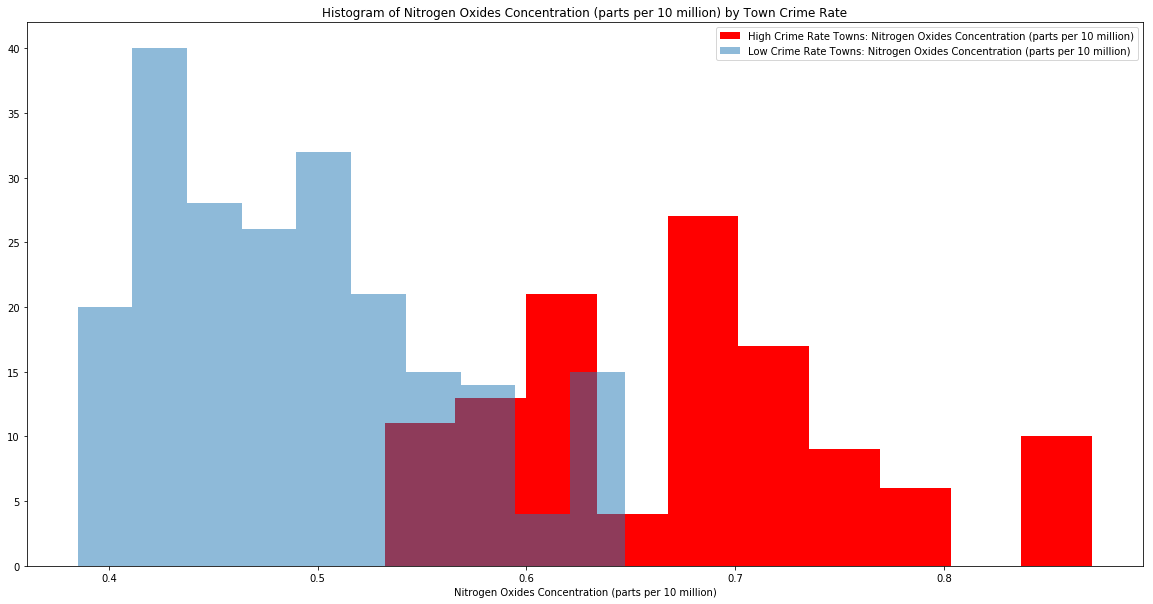

In [106]:
#Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.#
high_crime_df = df[df['high_crim']==1]
low_crime_df = df[df['high_crim']==0]

tax_fig = plt.figure(figsize=(20,5))
ax1 = tax_fig.add_subplot(121)
plt.ylabel('Per Capita Crime Rate')
plt.xlabel('Nitrogen Oxides Concentration (parts per 10 million)')
ax2 = tax_fig.add_subplot(122)
plt.xlabel('Nitrogen Oxides Concentration (parts per 10 million)')
ax1.scatter(x=high_crime_df['nox'], y=high_crime_df['dis'])
ax2.scatter(x=low_crime_df['nox'], y=low_crime_df['dis'])
ax1.title.set_text('High Crime Rate Towns: Distance to Radial Highway by Nitrogen Oxides Concentration (parts per 10 million)')
ax2.title.set_text('Low Crime Rate Towns: Distance to Radial Highway by Nitrogen Oxides Concentration (parts per 10 million)')
ax1.set_xlim(left=0.35, right=0.90)
ax2.set_xlim(left=0.35, right=0.90)
ax1.set_ylim(bottom=1.0, top=11.0)
ax2.set_ylim(bottom=1.0, top=11.0)




plt.show;

tax_fig = plt.figure(figsize=(20,10))
ax1 = tax_fig.add_subplot(111)
ax2 = tax_fig.add_subplot(111)
ax1.hist(high_crime_df['nox'], color='Red', label='High Crime Rate Towns: Nitrogen Oxides Concentration (parts per 10 million)')
ax2.hist(low_crime_df['nox'], alpha=0.5, label='Low Crime Rate Towns: Nitrogen Oxides Concentration (parts per 10 million)')
plt.legend()
plt.xlabel('Nitrogen Oxides Concentration (parts per 10 million)')
plt.title('Histogram of Nitrogen Oxides Concentration (parts per 10 million) by Town Crime Rate')

plt.show;